<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Средняя длина токена для уровня A1: 5.11
Средняя длина токена для уровня A2: 4.94
Средняя длина токена для уровня B1: 5.36
Средняя длина токена для уровня B2: 5.80


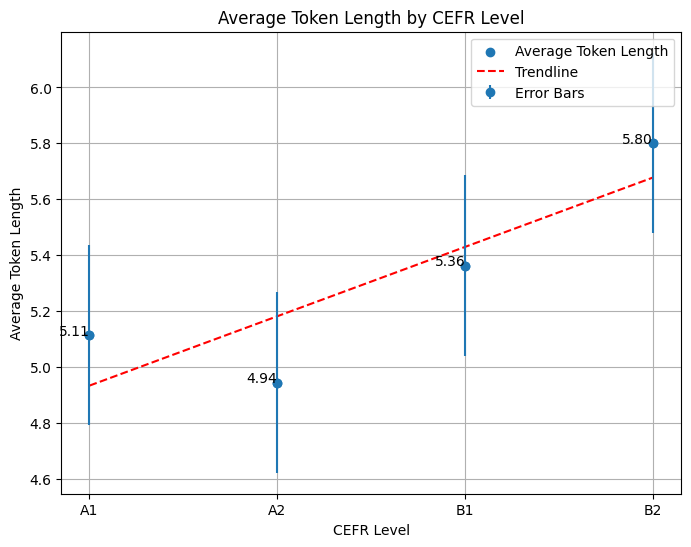

In [15]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Список для хранения средних значений длин токенов по каждому уровню
avg_token_lengths = []

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    # Список для хранения средних значений длин токенов в текущем уровне CEFR
    avg_lengths_in_level = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()
            token_lengths = [len(token) for token in tokens]
            avg_token_length = np.mean(token_lengths)
            avg_lengths_in_level.append(avg_token_length)

    # Среднее значение для текущего уровня CEFR
    avg_for_cefr = np.mean(avg_lengths_in_level)
    print(f"Средняя длина токена для уровня {cefr_level}: {avg_for_cefr:.2f}")

    # Добавление среднего значения в список
    avg_token_lengths.append(avg_for_cefr)

# Calculate standard deviation
std_deviation = np.std(avg_token_lengths)

# Linear function for trendline
def linear_func(x, a, b):
    return a * x + b

# Fit the data to a linear function
popt, _ = curve_fit(linear_func, range(1, 5), avg_token_lengths)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(cefr_levels, avg_token_lengths, label='Average Token Length')
plt.plot(cefr_levels, linear_func(np.arange(1, 5), *popt), 'r--', label='Trendline')

# Add error bars
plt.errorbar(cefr_levels, avg_token_lengths, yerr=std_deviation, linestyle='None', marker='o', label='Error Bars')

# Добавление числовых значений около каждой точки
for i, txt in enumerate(avg_token_lengths):
    plt.text(cefr_levels[i], avg_token_lengths[i], f'{avg_token_lengths[i]:.2f}', ha='right')

plt.xlabel('CEFR Level')
plt.ylabel('Average Token Length')
plt.title('Average Token Length by CEFR Level')
plt.legend()
plt.grid(True)

plt.show()

In [17]:
from scipy.stats import f_oneway

# Список для хранения длин токенов всех файлов
all_token_lengths = []

# Словарь для хранения средних значений длин токенов в каждом уровне CEFR
avg_lengths_in_level = {}

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    # Список для хранения средних значений длин токенов в текущем уровне CEFR
    lengths_in_level = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()
            token_lengths = [len(token) for token in tokens]
            avg_token_length = np.mean(token_lengths)
            lengths_in_level.append(avg_token_length)
            all_token_lengths.extend(token_lengths)

    # Среднее значение для текущего уровня CEFR
    avg_for_cefr = np.mean(lengths_in_level)
    print(f"Средняя длина токена для уровня {cefr_level}: {avg_for_cefr:.2f}")
    avg_lengths_in_level[cefr_level] = lengths_in_level

# ANOVA
f_statistic, p_value = f_oneway(
    avg_lengths_in_level['A1'],
    avg_lengths_in_level['A2'],
    avg_lengths_in_level['B1'],
    avg_lengths_in_level['B2']
)

print(f"F-статистика: {f_statistic}")
print(f"p-value: {p_value}")

Средняя длина токена для уровня A1: 5.11
Средняя длина токена для уровня A2: 4.94
Средняя длина токена для уровня B1: 5.36
Средняя длина токена для уровня B2: 5.80
F-статистика: 57.307530930111774
p-value: 2.0828233774138275e-34


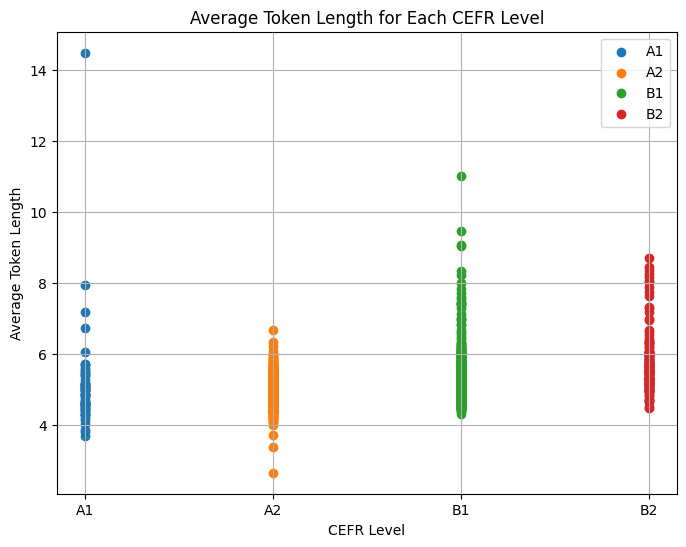

In [20]:
# Создание диаграммы
plt.figure(figsize=(8, 6))

# Группировка данных по уровню CEFR
for index, level in enumerate(cefr_levels):
    plt.scatter([level] * len(avg_lengths_in_level[level]), avg_lengths_in_level[level], label=level)

plt.xlabel('CEFR Level')
plt.ylabel('Average Token Length')
plt.title('Average Token Length for Each CEFR Level')
plt.legend()
plt.grid(True)

# Установка подписей на английском
plt.xticks([i for i in range(4)], ['A1', 'A2', 'B1', 'B2'])

plt.show()